# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Rifqi Rahmanda
- **Email:** rifqirahmanda2004@gmail.com / 22081010315@student.upnjatim.ac.id
- **ID Dicoding:** Muhammad Rifqi Rahmanda

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda selama 2 tahunan, dihari apa rara-rata penyewaan sepeda paling banyak?
- Pada kondisi cuaca apa yang dapat mempengaruhi besar atau sedikitnya jumlah peminjaman sepeda?


## Import Semua Packages/Library yang Digunakan

In [63]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

Pada bagian gathering data , saya memuat dataset Bike Sharing yang diberikan 2 dataset yaitu data hari dan data jam. Data tersebut ditampilkan dalam beberapa baris untuk mengetahui bagaimana data tersebut

In [64]:
# Load dataset
day_data = pd.read_csv('Data/day.csv')

# Show dataset
day_data.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [65]:
# Load dataset
hour_data = pd.read_csv('Data/hour.csv')

# Show dataset
hour_data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada Dataset ini berisikan data bike sharing berdasarkan data jam dan hari dengan penunjukkan adanya informasi tanggal , musim , hari , jam , suhu , dan jumlah penyewaan

- Dari beberapa baris pertama pada data jam dan hari , terlihat bahwa data bisa di analisis dengan Data harian menunjukkan tren penggunaan sepeda yang kemungkinan mengikuti pola musiman, sementara data per jam memungkinkan analisis lebih mendalam untuk mengidentifikasi pola penggunaan berdasarkan jam, seperti saat jam sibuk berangkat dan pulang kerja.








### Assessing Data

### Day Data


In [66]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [67]:
day_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [68]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


In [69]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Hour Data

In [70]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [71]:
hour_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [72]:
print("Jumlah Duplikasi :", hour_data.duplicated().sum())

Jumlah Duplikasi : 0


In [73]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua dataset memilik informasi yang detail dan tipe data yang digunakan sudah tepat.

- Kedua dataset menghasilkan nilai 0 untuk semua kolom yang berarti tidak memerlukan pemeberishan pada data tersebut.

### Cleaning Data



Setelah melakukan assesing data tidak terdapat duplikasi pada data sehingga harus dilanjukkan dengan menghapus data yang nantinya tidak akan digunakan.

In [74]:
del hour_data


Menghapus sebuah colom pada data day yang nantinya tidak digunakan.

In [75]:
drop_col = ["instant"]

for i in day_data.columns:
  if i in drop_col:
    day_data.drop(labels=i, axis=1, inplace=True)

day_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memberikan detailing nama kolom pada data tersebut.

In [76]:
day_data.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather_category",
    "hum": "humidity",
    "cnt": "count"
}, inplace=True)

day_data.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_category,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Detailing kolom pda bagian season, year , month , weekday , dan weather category

In [77]:
day_data["season"] = day_data["season"].map({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})
day_data["year"] = day_data["year"].map({
    0: "2011", 1: "2012"
})
day_data["month"] = day_data["month"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})
day_data["weekday"] = day_data["weekday"].map({
    0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"
})
day_data["weather_category"] = day_data["weather_category"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
})

Mengubah tipe data pada data hari.

In [78]:
day_data["dateday"] = pd.to_datetime(day_data.dateday)
day_data["season"] = day_data.season.astype("category")
day_data["year"] = day_data.year.astype("category")
day_data["month"] = day_data.month.astype("category")
day_data["holiday"] = day_data.holiday.astype("category")
day_data["weekday"] = day_data.weekday.astype("category")
day_data["workingday"] = day_data.workingday.astype("category")
day_data["weather_category"] = day_data.weather_category.astype("category")

day_data.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_category,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateday           731 non-null    datetime64[ns]
 1   season            731 non-null    category      
 2   year              731 non-null    category      
 3   month             731 non-null    category      
 4   holiday           731 non-null    category      
 5   weekday           731 non-null    category      
 6   workingday        731 non-null    category      
 7   weather_category  731 non-null    category      
 8   temp              731 non-null    float64       
 9   atemp             731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual            731 non-null    int64         
 13  registered        731 non-null    int64         
 14  count             731 non-

In [80]:
day_data.to_csv('day_dataset.csv', index=False)

**Insight:**
- Melakukan penghapusan data yang tidak digunakn sehingga memberikan ruang untuk data yang digunakn dijalankan.
- Melakukan pengubahan nama kolom serta memberikan detailing data pada masing masing kolom agar lebih mudah dijalankan setelah melakukan perubah kolom kita harus juga mengubah tipe data agar sesuai dengan kolom.


## Exploratory Data Analysis (EDA)

### Explore ...

sebagai awal , kita melakukan rangkuman parameter pada data day_data menggunakan describe.

In [81]:
day_data.describe(include="all")

,dateday,season,year,month,holiday,weekday,workingday,weather_category,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Aug,0.0,Mon,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Mengexplore dengan melakukan grouping dengan kolom weekday dan count





In [82]:
day_data.groupby(by=["weekday"], observed=False).agg({
    "count": ["sum", "mean"]
})

count             
            sum         mean
weekday                     
Fri      487790  4690.288462
Mon      455503  4338.123810
Sat      477807  4550.542857
Sun      444027  4228.828571
Thu      485395  4667.259615
Tue      469109  4510.663462
Wed      473048  4548.538462

Mengexplore dengan melakukan grouping dengan kolom weather_category dan count





In [83]:
day_data.groupby(by='weather_category').agg({
      "count" : ["sum","mean"]
    })

<ipython-input-83-f33379359162>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_data.groupby(by='weather_category').agg({


count             
                         sum         mean
weather_category                         
Clear/Partly Cloudy  2257952  4876.786177
Light Rain/Snow        37869  1803.285714
Misty/Cloudy          996858  4035.862348

**Insight:**
- Melakukan Grouping pada bagian weekday dan count untuk mengetahui hari apa saja yang memiliki banyak jumlah untuk menjawab pertanyaan 1
- Melakukan Grouping pada bagian weather_category dan count untuk mengetahui cuaca apa saja yang mempnegaruhi jumlah penyewaan berdasarkan cuaca untuk menjawab pertanyaan 2

## Visualization & Explanatory Analysis

### Pertanyaan 1 :

### Bagaimana tren penggunaan sepeda selama 2 tahunan, dihari apa rara-rata penyewaan sepeda paling banyak?

Pertama melakukan grouping pada data menggunakan kolom day dan count

In [84]:
avg_rent_by_days = (
    day_data.groupby("weekday", observed=True)["count"]  # Atur observed sesuai kebutuhan
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

avg_rent_by_days.rename(columns={
    "count": "avg_peminjaman",
    "weekday": "hari"
}, inplace=True)

print(avg_rent_by_days)


  hari  avg_peminjaman
0  Fri     4690.288462
1  Thu     4667.259615
2  Sat     4550.542857
3  Wed     4548.538462
4  Tue     4510.663462
5  Mon     4338.123810
6  Sun     4228.828571


Melakukan tampilan grafik yang berisi 3 penyewaan rata-rata jumlah peminjaman terbanyak

<ipython-input-97-14918c340adc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


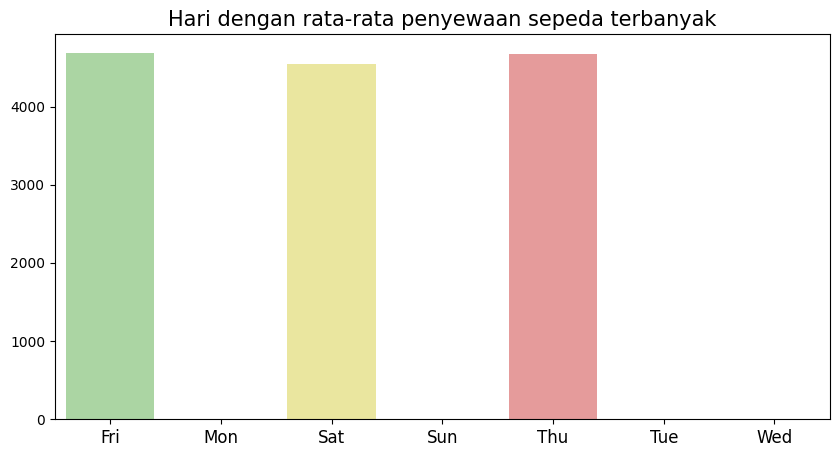

In [97]:
colors = ['#A5DD9B', '#C5EBAA', '#F6F193', '#F2C18D', '#F28E8E', '#A8D0E6', '#FFD3B4']
plt.figure(figsize=(10, 5))

sns.barplot(
    y="avg_peminjaman",
    x="hari",
    data=avg_rent_by_days.sort_values(by="avg_peminjaman", ascending=False).head(3),
    palette=colors
)
plt.title("Hari dengan rata-rata penyewaan sepeda terbanyak", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2 :

### Pada kondisi cuaca apa yang dapat mempengaruhi besar atau sedikitnya jumlah peminjaman sepeda?

menggelompokkan data berdasarkan preferensi cuaca tertentu, disini menggunakan nilai unique nya yang ada pada data tersebut


In [102]:
customer_by_weather = (
    day_data.groupby("weather_category", observed=True)["count"]  # Atur observed sesuai kebutuhan
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

print(customer_by_weather)


      weather_category  count
0  Clear/Partly Cloudy    451
1         Misty/Cloudy    243
2      Light Rain/Snow     21


Memberika Visualai sasi pada weather category menggunakann barplot

<ipython-input-104-3cbd234da641>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-104-3cbd234da641>:4: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(


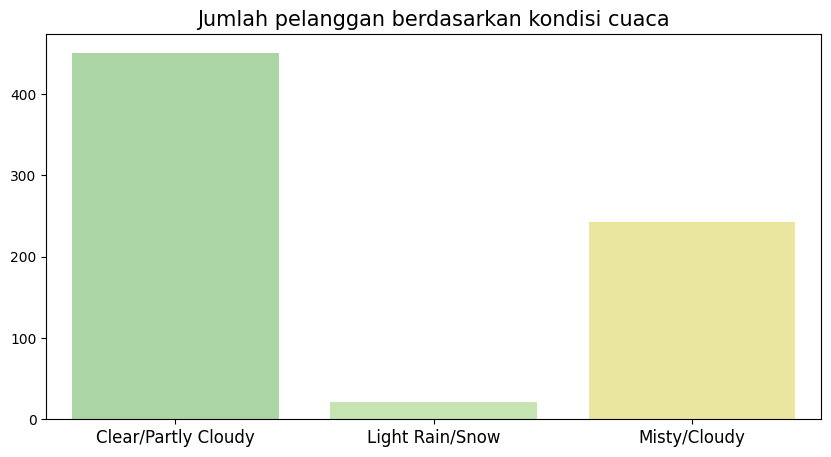

In [104]:
colors = ['#A5DD9B', '#C5EBAA', '#F6F193', '#F2C18D', '#F28E8E', '#A8D0E6', '#FFD3B4']
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="weather_category",
    data=customer_by_weather.sort_values(by="count", ascending=False).head(3),
    palette=colors
)
plt.title("Jumlah pelanggan berdasarkan kondisi cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Insight


*   Pada Pertanyaan pertama melakukan pengelompokkan data berdasarkan preferensi cuaca tertentu, disini menggunakan nilai unique nya yang ada pada data tersebut kemudian menampilkan dalam bentuk grafik berdasarkan 3 jumlah terbanyak
*   Pada pertayaan kedua menggelompokkan data berdasarkan preferensi cuaca tertentu, disini menggunakan nilai unique yang ada pada data tersebut kemudian menampilkan nilai tersebut menggunakan grafik.





## Conclusion

- Dari Hasil Anlisa di atas , pada pertanyaan pertama dengan menganalisa bawah dalam 2 tahun terakhir , hari dengan rata-rata jumlah penyewaan terbanyak berada pada hari Friday , Saturday , dan Thursday
- Dari Hasil Analisa pada pertanyaan 2 , dapat disimpulkan pada visualisai data jika kondisi cuaca dapat mempengaruhi jumlah penyewaan sepeda , seperti ketika kondisi cuaca baik maka cenderung penyewaan cenderung paling banyak ,sedangkan ketika mendung peminjaman akan berkurang, dan pada ketika cuaca cukup buruk jumalh penyewaan akan semakin turun.